In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_rides_merged = pd.merge(city_df, ride_df, how='inner', sort='city')
# Display the data table for preview
pyber_rides_merged.head()

,city,driver_count,type,date,fare,ride_id
0,Amandaburgh,12,Urban,2018-03-05 02:15:38,26.28,906850928986
1,Amandaburgh,12,Urban,2018-02-24 23:10:49,43.66,6573820412437
2,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
3,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
4,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492


## Bubble Plot of Ride Sharing Data

In [4]:
#get city types
city_types = pyber_rides_merged['type'].unique()

#group the data up by city
grouped_by_city = pyber_rides_merged.groupby(['city','type'])

total_rides = grouped_by_city['ride_id'].count()
average_fare = grouped_by_city['fare'].mean()
driver_count = grouped_by_city['driver_count'].mean()
total_fares = grouped_by_city['fare'].sum()

pyber_summary = pd.DataFrame({"total_rides": total_rides,
                              "average_fare":average_fare,
                              "total_fares": total_fares,
                             "driver_count": driver_count})

pyber_summary = pyber_summary.reset_index()

#Obtain the x and y coordinates for each of the three city types
urban_df = pyber_summary[pyber_summary['type'] == 'Urban']
suburban_df = pyber_summary[pyber_summary['type'] == 'Suburban']
rural_df = pyber_summary[pyber_summary['type'] == 'Rural']

pyber_summary.head()

,city,type,total_rides,average_fare,total_fares,driver_count
0,Amandaburgh,Urban,18,24.641667,443.55,12
1,Barajasview,Urban,22,25.332273,557.31,26
2,Barronchester,Suburban,16,36.422500,582.76,11
3,Bethanyland,Suburban,18,32.956111,593.21,22
4,Bradshawfurt,Rural,10,40.064000,400.64,7


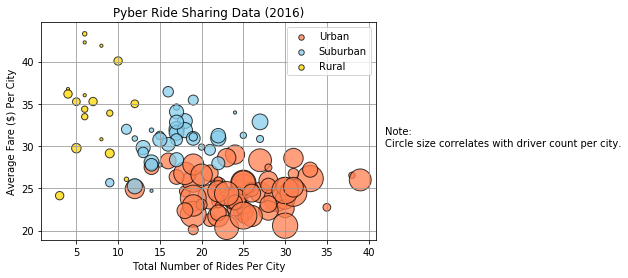

In [21]:
# Build the scatter plots for each city types
urban_plot = plt.scatter(x=urban_df['total_rides'], y=urban_df['average_fare'], s=urban_df['driver_count']*10, alpha=0.75, c='coral', edgecolors='black', label="Urban")
suburban_plot = plt.scatter(x=suburban_df['total_rides'], y=suburban_df['average_fare'], s=suburban_df['driver_count']*10, alpha=0.75, c='skyblue', edgecolors='black', label='Suburban')
rural_plot = plt.scatter(x=rural_df['total_rides'], y=rural_df['average_fare'], s=rural_df['driver_count']*10, alpha=0.75, c='gold', edgecolors='black', label='Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides Per City')
plt.ylabel('Average Fare ($) Per City')
plt.grid(b=True, which='major', color='#999999', linestyle='-')

# Create a legend
lgnd = plt.legend(handles=[urban_plot, suburban_plot, rural_plot], loc="best", markerscale=1)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
plt.text(42, 30, "Note:\nCircle size correlates with driver count per city.", fontsize=10)

# Save Figure
plt.savefig("pyber_fares_vs_rides.png")


In [6]:
# Show plot
plt.show()

## Total Fares by City Type

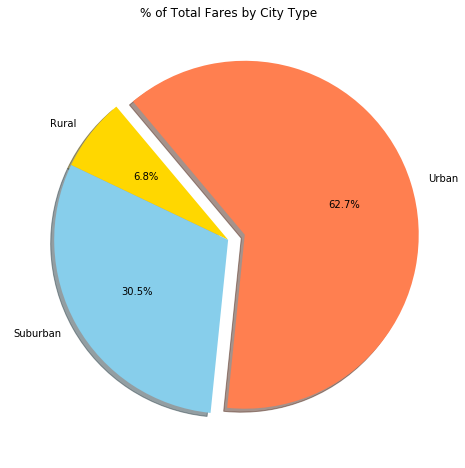

In [7]:
# Calculate Type Percents
grouped_by_city_type = pyber_summary.groupby('type')

fares_by_city_type = grouped_by_city_type.total_fares.sum()
fares_by_city_type

# Build Pie Chart

#just trying out the other method
#fig1, ax1 = plt.subplots()
#ax1.pie(fares_by_city_type, autopct='%1.1f%%', shadow=True, startangle=130, colors = ('gold', 'skyblue', 'coral'),explode = (0, 0, 0.1))
#plt.title("% of Total Fares by City Type")

#just trying out the other method
fares_by_city_type_chart = fares_by_city_type.plot(kind="pie", explode = (0, 0, 0.1), autopct='%1.1f%%', \
                        startangle=130, shadow=True, colors = ('gold', 'skyblue', 'coral'), \
                        title="% of Total Fares by City Type", figsize=(8, 8))
fares_by_city_type_chart.set_ylabel('')
# Save Figure
plt.savefig("total_fares_by_city_type.png")

In [8]:
# Show Figure
plt.show()

# Total Rides by City Type

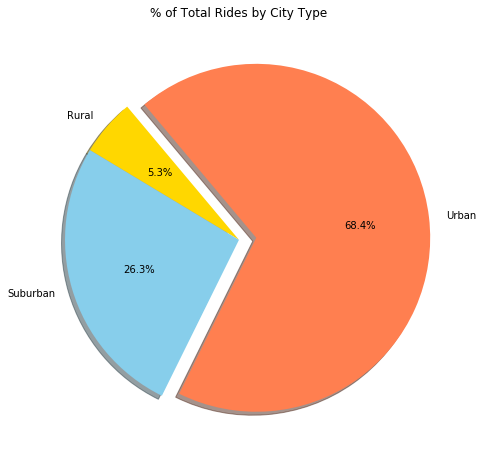

In [9]:
# Calculate Ride Percents
rides_by_city_type = grouped_by_city_type.total_rides.sum()

# Build Pie Chart
rides_by_city_type_chart = rides_by_city_type.plot(kind="pie", explode = (0, 0, 0.1), autopct='%1.1f%%', \
                        startangle=130, shadow=True, colors = ('gold', 'skyblue', 'coral'), \
                        title="% of Total Rides by City Type", figsize=(8, 8))
rides_by_city_type_chart.set_ylabel('')

# Save Figure
plt.savefig("total_rides_by_city_type.png")


In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

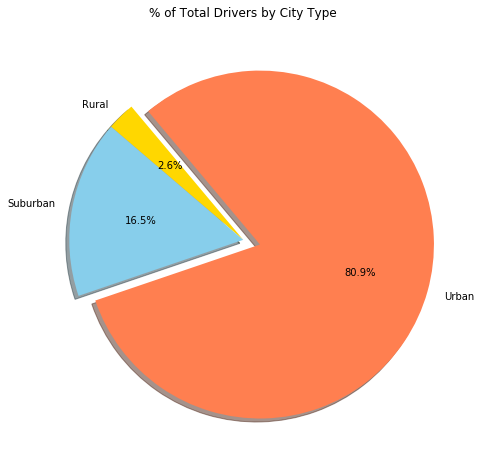

In [13]:
# Calculate Driver Percents
drivers_by_city_type = grouped_by_city_type.driver_count.sum()

# Build Pie Chart
drivers_by_city_type_chart = drivers_by_city_type.plot(kind="pie", explode = (0, 0, 0.1), autopct='%1.1f%%', \
                        startangle=130, shadow=True, colors = ('gold', 'skyblue', 'coral'), \
                        title="% of Total Drivers by City Type", figsize=(8, 8))
drivers_by_city_type_chart.set_ylabel('')

# Save Figure
plt.savefig("total_drivers_by_city_type.png")


In [12]:
# Show Figure
plt.show()

# Trends

### 1. The majority of fares are generated in cities.
### 2. More drivers correlates with more rides and vice versa.
### 3. Average fare inversely correlates with total rides, ie...As the total number of rid